### continuation


In [1]:
import random, pylab, numpy

#set line width
pylab.rcParams['lines.linewidth'] = 4
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.labelsize'] = 16
#set size of numbers on y-axis
pylab.rcParams['ytick.labelsize'] = 16
#set size of ticks on x-axis
pylab.rcParams['xtick.major.size'] = 7
#set size of ticks on y-axis
pylab.rcParams['ytick.major.size'] = 7
#set size of markers
pylab.rcParams['lines.markersize'] = 10
#set number of examples shown in legends
pylab.rcParams['legend.numpoints'] = 1

#### what does it mean for a data to fit

use coefficent of determination 

closer to 1 the better
closer to 0 worse

In [3]:
## coefficent of determination
def rSquared(observed, predicted):
    error = ((predicted - observed)**2).sum()
    meanError = error/len(observed)
    return 1 - (meanError/numpy.var(observed))

def genFits(xVals, yVals, degrees):
    models = []
    for d in degrees:
        model = pylab.polyfit(xVals, yVals, d)
        models.append(model)
    return models

def testFits(models, degrees, xVals, yVals, title):
    pylab.plot(xVals, yVals, 'o', label = 'Data')
    for i in range(len(models)):
        estYVals = pylab.polyval(models[i], xVals)
        error = rSquared(yVals, estYVals)
        pylab.plot(xVals, estYVals,
                   label = 'Fit of degree '\
                   + str(degrees[i])\
                   + ', R2 = ' + str(round(error, 5)))
    pylab.legend(loc = 'best')
    pylab.title(title)

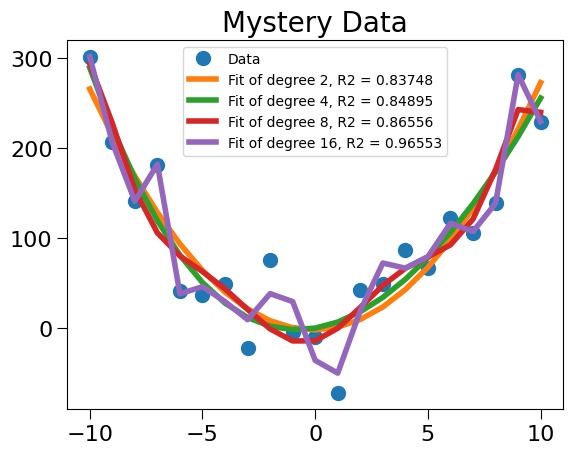

In [4]:
##Compare higher-order fits
xVals, yVals = getData('mysteryData.txt')
degrees = (2, 4, 8, 16)
models = genFits(xVals, yVals, degrees)
testFits(models, degrees, xVals, yVals, 'Mystery Data')

In [6]:
def genNoisyParabolicData(a, b, c, xVals, fName):
    yVals = []
    for x in xVals:
        theoreticalVal = a*x**2 + b*x + c
        yVals.append(theoreticalVal + random.gauss(0, 35))
    f = open(fName,'w')
    f.write('x        y\n')
    for i in range(len(yVals)):
        f.write(str(yVals[i]) + ' ' + str(xVals[i]) + '\n')
    f.close()
    
#parameters for generating data
xVals = range(-10, 11, 1)
a, b, c = 3.0, 0.0, 0.0
degrees = (2, 4, 8, 16)

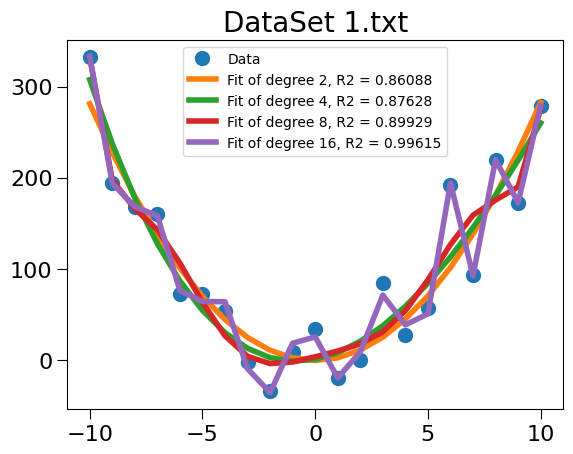

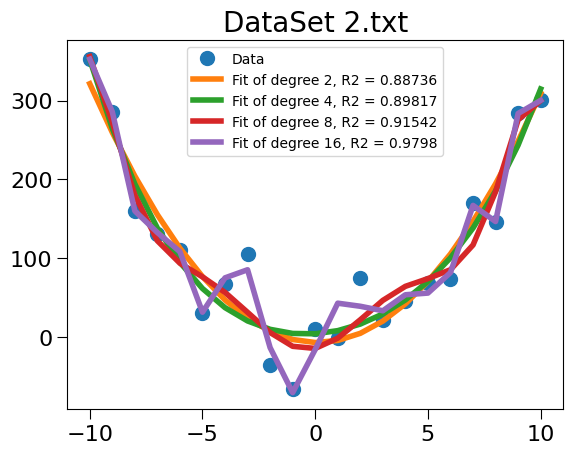

In [10]:
random.seed(0)
genNoisyParabolicData(a, b, c, xVals,
                     'Dataset 1.txt')
genNoisyParabolicData(a, b, c, xVals,
                     'Dataset 2.txt')

xVals1, yVals1 = getData('Dataset 1.txt')
models1 = genFits(xVals1, yVals1, degrees)
testFits(models1, degrees, xVals1, yVals1,
       'DataSet 1.txt')

pylab.figure()
xVals2, yVals2 = getData('Dataset 2.txt')
models2 = genFits(xVals2, yVals2, degrees)
testFits(models2, degrees, xVals2, yVals2,
        'DataSet 2.txt')

### cross validation

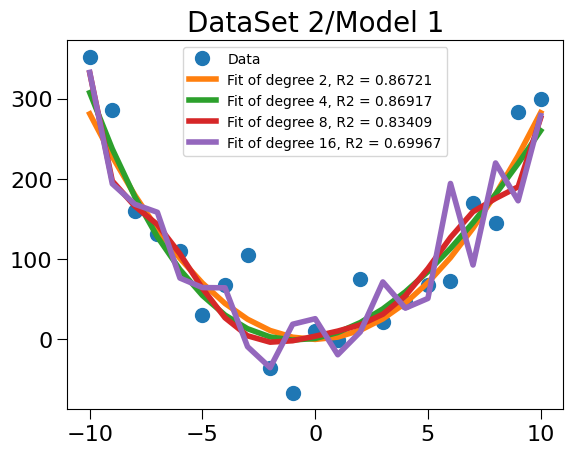

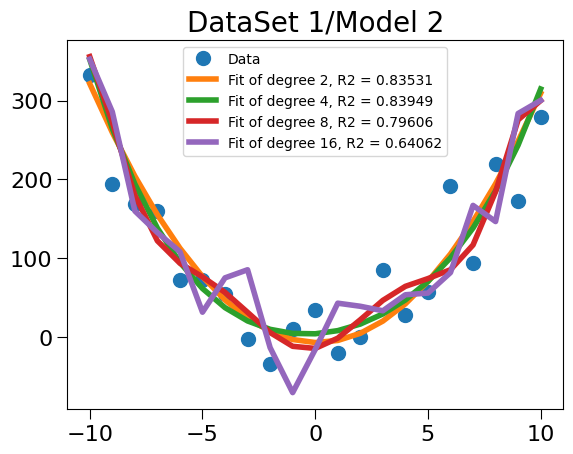

In [11]:
# swapping the datasets and then checking if the model models the dataset well
pylab.figure()
testFits(models1, degrees, xVals2, yVals2,
        'DataSet 2/Model 1')
pylab.figure()
testFits(models2, degrees, xVals1, yVals1,
        'DataSet 1/Model 2')

a common problem in data analysis is that the models that are built are given too many variables, not only follow the trend but the noise in the data that is being used.


a = -0.0 b = 1.0 c = 0.0
R-squared =  1.0


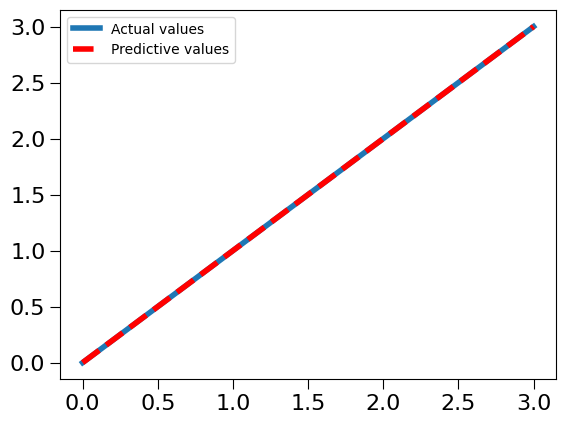

In [12]:
#a line
xVals = (0,1,2,3)
yVals = xVals
# fitting a polynomial line on a linear line
pylab.plot(xVals, yVals, label = 'Actual values')
a,b,c = pylab.polyfit(xVals, yVals, 2)
print('a =', round(a, 4), 'b =', round(b, 4),
     'c =', round(c, 4))
# compute the R value here
estYVals = pylab.polyval((a,b,c), xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predictive values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')


R-squared =  1.0


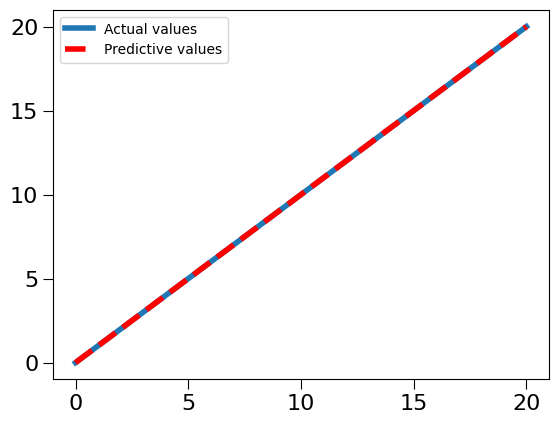

In [13]:
pylab.figure()
#Extend domain
xVals = xVals + (20,)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
estYVals = pylab.polyval((a,b,c), xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predictive values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

polyfit calcualtes that the best line is 0x^2 + x + 0

[0.025 0.955 0.005]
R-squared =  0.9999057936881771


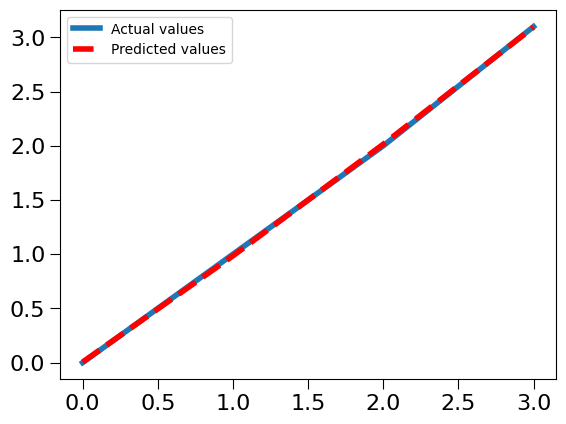

In [14]:
##almost a line
pylab.figure()
xVals = (0,1,2,3)
yVals = (0,1,2,3.1)
pylab.plot(xVals, yVals, label = 'Actual values')
model = pylab.polyfit(xVals, yVals, 2)
print(model)
estYVals = pylab.polyval(model, xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predicted values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

the line that is calculated is now 0.025x^2 + 0.955x + 0.005 = 0

R-squared =  0.7026164813486397


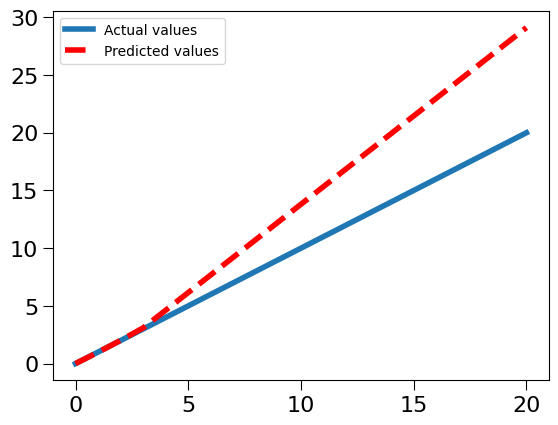

In [15]:
# introducing errors into the data 
pylab.figure()
#Extend domain
xVals = xVals + (20,)
yVals = xVals
pylab.plot(xVals, yVals, label = 'Actual values')
estYVals = pylab.polyval(model, xVals)
pylab.plot(xVals, estYVals, 'r--', label = 'Predicted values')
print('R-squared = ', rSquared(yVals, estYVals))
pylab.legend(loc = 'best')

#### repeated randoom sampling
refer to lecturefittingtemp py file 

most of the time can either use theory to prove the model or we would have to build a training and testing set to prove our model